Семестровый проект

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from __future__ import division
%matplotlib inline

Импортируем наш датасет

In [2]:
!ls

data_glossary.csv  data_stores.csv	  introdata_project.ipynb
data_products.csv  data_transactions.csv  store.xlsx


In [3]:
glossary = pd.read_csv('data_glossary.csv')
products = pd.read_csv('data_products.csv')
stores = pd.read_csv('data_stores.csv')
transactions = pd.read_csv('data_transactions.csv')

Посмотрим описание датасета

In [4]:
glossary

,VARIABLE NAME,TABLE,DESCRIPTION
0,ADDRESS_CITY_NAME,store lookup,city
1,ADDRESS_STATE_PROV_CODE,store lookup,state
2,AVG_WEEKLY_BASKETS,store lookup,average weekly baskets sold in the store
3,BASE_PRICE,data,base price of item
4,MANUFACTURER,products lookup,manufacturer
5,CATEGORY,products lookup,category of product
6,DESCRIPTION,products lookup,prodcut description
7,DISPLAY,data,product was a part of in-store promotional dis...
8,FEATURE,data,product was in in-store circular
9,HHS,data,# of purchasing households


Теперь попробуем выделить что-то интересное из таблицы с магазинами

In [5]:
stores.head()

,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,408.0,46073,24766.807692
1,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,NaN,81958,54052.519231
2,4259,WARSAW AVENUE,CINCINNATI,OH,17140,VALUE,NaN,48813,31177.333333
3,6379,KINGWOOD,KINGWOOD,TX,26420,MAINSTREAM,NaN,50237,20620.423077
4,6431,AT WARD ROAD,BAYTOWN,TX,26420,VALUE,350.0,43698,24321.942308


In [6]:
stores.describe()

/home/dima/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,STORE_ID,MSA_CODE,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
count,79.000000,79.000000,27.000000,79.000000,79.000000
mean,14502.468354,21236.202532,480.518519,49145.164557,24146.806232
std,8868.762031,6138.649376,403.659641,13512.452153,8720.396844
min,367.000000,13140.000000,17.000000,10788.000000,10434.705128
25%,6183.000000,17140.000000,NaN,43067.500000,17522.432693
50%,15541.000000,19100.000000,NaN,48594.000000,24567.750000
75%,23058.000000,26420.000000,NaN,55200.500000,29186.262821
max,29159.000000,47540.000000,1859.000000,86517.000000,54052.519231


Видно, что в столбце с количеством машиномест на парковке магазина есть пропущенные данные, заменим их на 0

In [7]:
stores['PARKING_SPACE_QTY'] = stores['PARKING_SPACE_QTY'].fillna(0)

Посмотрим распределение магазинов по MSA (Metropolitan Statistical Area)

In [8]:
stores['MSA_CODE'].value_counts()

17140    29
26420    21
19100    19
19380     5
13140     1
47540     1
44220     1
43300     1
17780     1
Name: MSA_CODE, dtype: int64

Видно, что только в трех регионах 

MSA 17140 median weekly baskets 24766.807692 and mean 26145.5382405
MSA 26420 median weekly baskets 25350.858974 and mean 25080.1489621
MSA 19100 median weekly baskets 21946.846154 and mean 20769.3927125


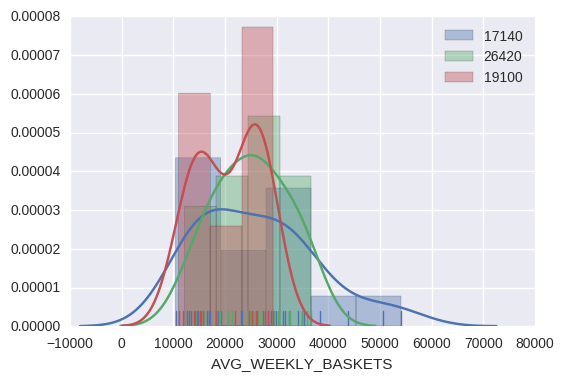

In [9]:
sns.distplot(stores[stores['MSA_CODE'] == 17140]['AVG_WEEKLY_BASKETS'], rug=True, label='17140')
sns.distplot(stores[stores['MSA_CODE'] == 26420]['AVG_WEEKLY_BASKETS'], rug=True, label='26420')
sns.distplot(stores[stores['MSA_CODE'] == 19100]['AVG_WEEKLY_BASKETS'], rug=True, label='19100')
plt.axes().legend()
print "MSA 17140 median weekly baskets", stores[stores['MSA_CODE'] == 17140]['AVG_WEEKLY_BASKETS'].median(), "and mean", stores[stores['MSA_CODE'] == 17140]['AVG_WEEKLY_BASKETS'].mean()
print "MSA 26420 median weekly baskets", stores[stores['MSA_CODE'] == 26420]['AVG_WEEKLY_BASKETS'].median(), "and mean", stores[stores['MSA_CODE'] == 26420]['AVG_WEEKLY_BASKETS'].mean()
print "MSA 19100 median weekly baskets", stores[stores['MSA_CODE'] == 19100]['AVG_WEEKLY_BASKETS'].median(), "and mean", stores[stores['MSA_CODE'] == 19100]['AVG_WEEKLY_BASKETS'].mean()

MSA 17140 median stores space area 49074.0 and mean 26145.5382405
MSA 26420 median stores space area 48632.0 and mean 25080.1489621
MSA 19100 median stores space area 48330.0 and mean 20769.3927125


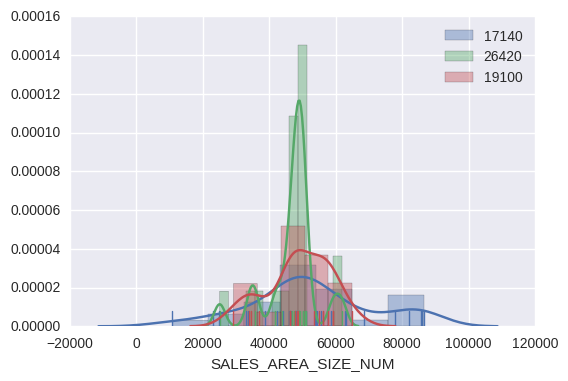

In [18]:
sns.distplot(stores[stores['MSA_CODE'] == 17140]['SALES_AREA_SIZE_NUM'], rug=True, label='17140')
sns.distplot(stores[stores['MSA_CODE'] == 26420]['SALES_AREA_SIZE_NUM'], rug=True, label='26420')
sns.distplot(stores[stores['MSA_CODE'] == 19100]['SALES_AREA_SIZE_NUM'], rug=True, label='19100')
plt.axes().legend()
print "MSA 17140 median stores space area", stores[stores['MSA_CODE'] == 17140]['SALES_AREA_SIZE_NUM'].median(), "and mean", stores[stores['MSA_CODE'] == 17140]['AVG_WEEKLY_BASKETS'].mean()
print "MSA 26420 median stores space area", stores[stores['MSA_CODE'] == 26420]['SALES_AREA_SIZE_NUM'].median(), "and mean", stores[stores['MSA_CODE'] == 26420]['AVG_WEEKLY_BASKETS'].mean()
print "MSA 19100 median stores space area", stores[stores['MSA_CODE'] == 19100]['SALES_AREA_SIZE_NUM'].median(), "and mean", stores[stores['MSA_CODE'] == 19100]['AVG_WEEKLY_BASKETS'].mean()

Видно, что для трех крупнейших экономических регионов покупательная способность жителей практически одинакова

In [10]:
stores[stores['MSA_CODE'] == 17140]['STORE_ID'].tolist()

[389,
 2277,
 4259,
 15531,
 19265,
 25021,
 367,
 8035,
 8041,
 25027,
 11757,
 21227,
 21237,
 23075,
 26973,
 4245,
 21221,
 23055,
 24991,
 2281,
 9825,
 15547,
 2279,
 6179,
 11761,
 15541,
 21213,
 23061,
 28909]

In [11]:
glossary

,VARIABLE NAME,TABLE,DESCRIPTION
0,ADDRESS_CITY_NAME,store lookup,city
1,ADDRESS_STATE_PROV_CODE,store lookup,state
2,AVG_WEEKLY_BASKETS,store lookup,average weekly baskets sold in the store
3,BASE_PRICE,data,base price of item
4,MANUFACTURER,products lookup,manufacturer
5,CATEGORY,products lookup,category of product
6,DESCRIPTION,products lookup,prodcut description
7,DISPLAY,data,product was a part of in-store promotional dis...
8,FEATURE,data,product was in in-store circular
9,HHS,data,# of purchasing households


In [12]:
whole_data = transactions.join(stores.set_index('STORE_ID'), on='STORE_NUM')
whole_data = whole_data.join(products.set_index('UPC'), on='UPC')

In [13]:
whole_data.columns

Index([u'WEEK_END_DATE', u'STORE_NUM', u'UPC', u'UNITS', u'VISITS', u'HHS',
       u'SPEND', u'PRICE', u'BASE_PRICE', u'FEATURE', u'DISPLAY', u'TPR_ONLY',
       u'STORE_NAME', u'ADDRESS_CITY_NAME', u'ADDRESS_STATE_PROV_CODE',
       u'MSA_CODE', u'SEG_VALUE_NAME', u'PARKING_SPACE_QTY',
       u'SALES_AREA_SIZE_NUM', u'AVG_WEEKLY_BASKETS', u'DESCRIPTION',
       u'MANUFACTURER', u'CATEGORY', u'SUB_CATEGORY', u'PRODUCT_SIZE'],
      dtype='object')

In [14]:
def disp_manuf_perc ():
    manuf = whole_data.MANUFACTURER.unique()
    displ = {}
    for m in manuf:
         displ[m] = whole_data[whole_data['MANUFACTURER'] == m]['DISPLAY'].sum() / len(whole_data[whole_data['MANUFACTURER'] == m])
    for w in sorted(displ, key=displ.get, reverse=True):
        print w, displ[w]
disp_manuf_perc()

TOMBSTONE 0.223757886974
SNYDER S 0.164399509804
QUAKER 0.151111111111
TONYS 0.143648821119
P & G 0.131049766972
WARNER 0.119977833195
KELLOGG 0.114610530896
PRIVATE LABEL 0.111061596356
GENERAL MI 0.093834725084
FRITO LAY 0.0696527945802
POST FOODS 0.058386844166
MKSL 0.0403319743739
KING 0.038624470471
SHULTZ 0.0193777292576
CHATTEM 0.0026734452382
COLGATE 0.0


In [15]:
def disp_manuf_perc ():
    manuf = whole_data.MANUFACTURER.unique()
    displ = {}
    for m in manuf:
        displ[m] = whole_data[whole_data['MANUFACTURER'] == m]['FEATURE'].sum() / len(whole_data[whole_data['MANUFACTURER'] == m])
    for w in sorted(displ, key=displ.get, reverse=True):
        print w, displ[w]
disp_manuf_perc()

TOMBSTONE 0.282538035017
TONYS 0.195203869148
QUAKER 0.137840819543
KELLOGG 0.13315926893
GENERAL MI 0.0997722589741
P & G 0.0961770361438
POST FOODS 0.0670007830854
WARNER 0.0623749268803
PRIVATE LABEL 0.0497198879552
FRITO LAY 0.0425235906121
SNYDER S 0.0214767156863
KING 0.0117119362073
COLGATE 0.0
CHATTEM 0.0
MKSL 0.0
SHULTZ 0.0


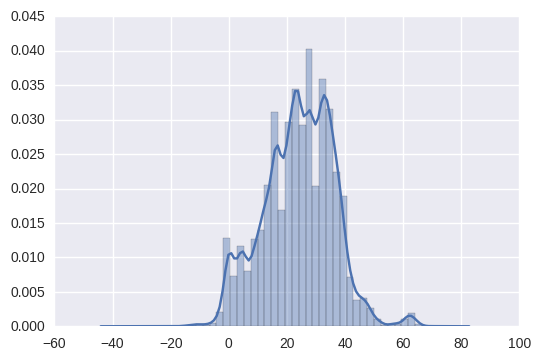

In [43]:
def discounts():
    df = whole_data[whole_data['FEATURE'] == 1]
    discounts = 100*(df['BASE_PRICE'] - df['PRICE'])/df['BASE_PRICE']
    discounts.dropna(inplace=True)
    sns.distplot(discounts)
discounts()

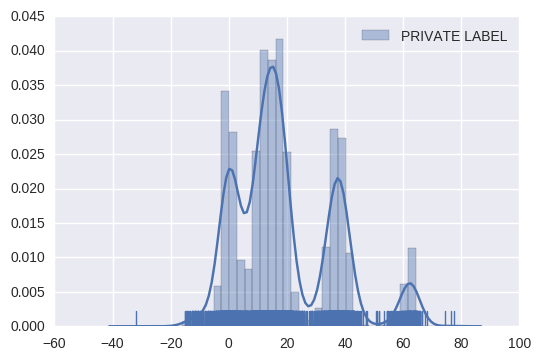

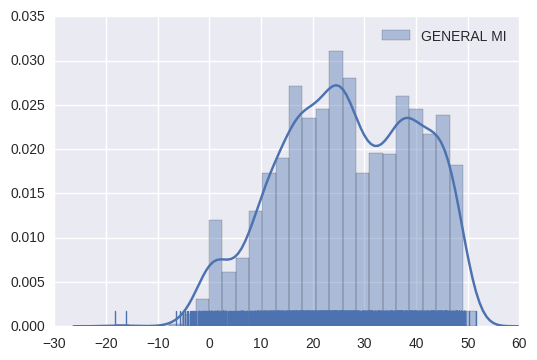

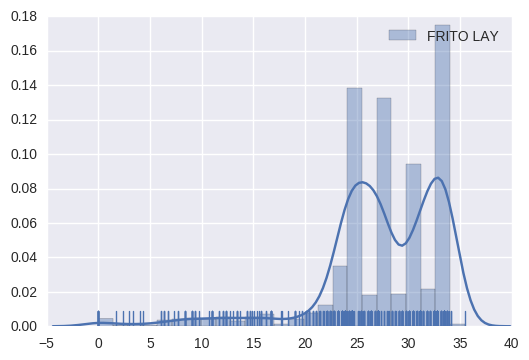

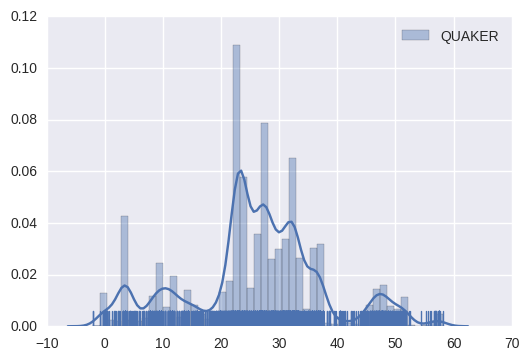

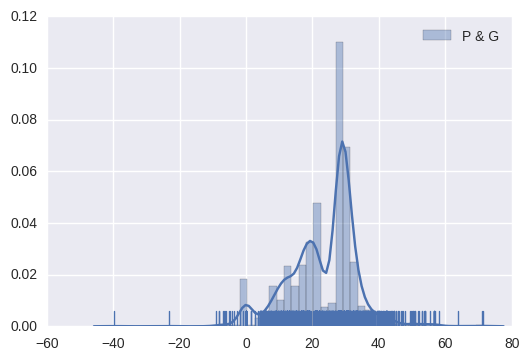

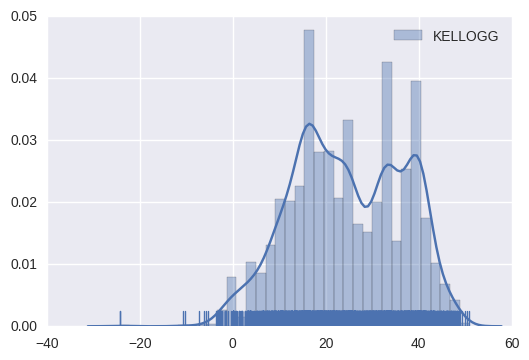

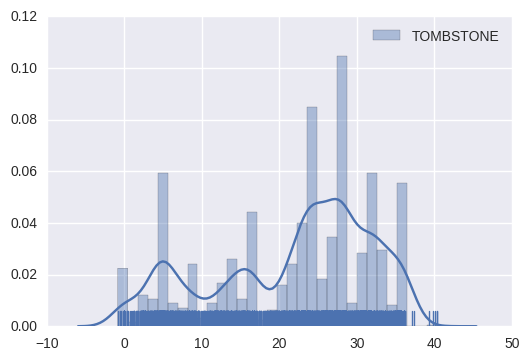

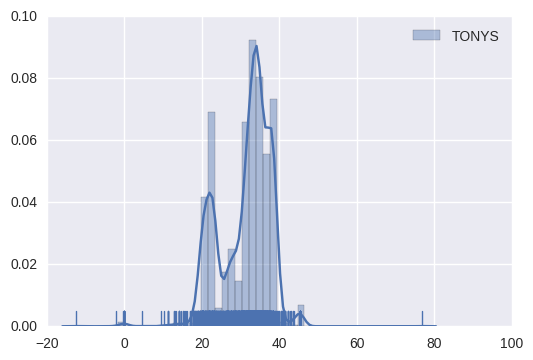

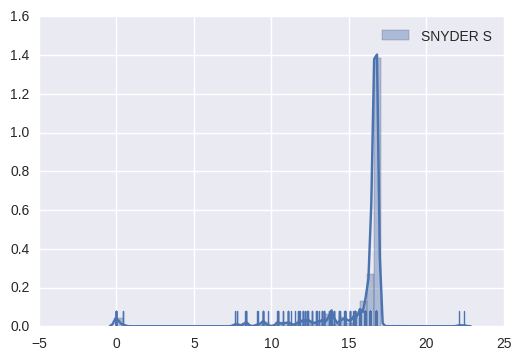

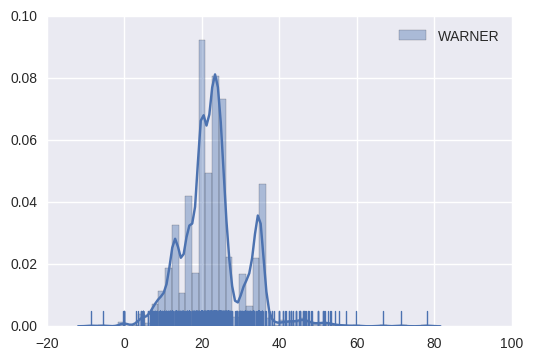

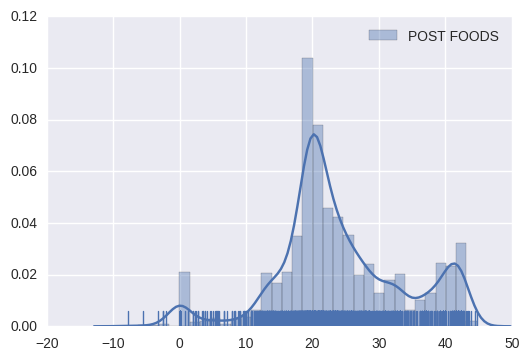

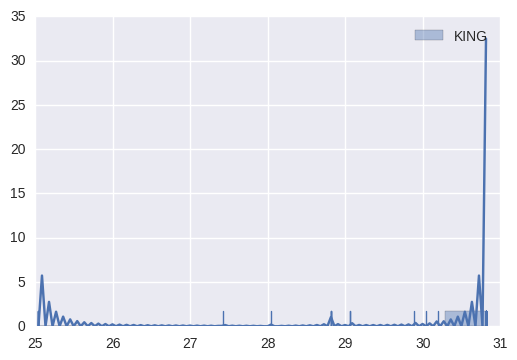

In [16]:
def feature_price ():
    d={}
    for m in whole_data.MANUFACTURER.unique():
        df = whole_data[whole_data['MANUFACTURER'] == m]
        disp = df[df['FEATURE'] == 1]
        
        d[m]= 100*(disp['BASE_PRICE'] - disp['PRICE'])/disp['BASE_PRICE']
        d[m].dropna(inplace=True)
        if len(d[m]) != 0:
            sns.distplot(d[m], rug=True, label=m)
            plt.axes().legend()
            plt.show()
    return d
d = feature_price()
        

Рассмотрим распределение скидок на товары, которые присутствуют в каталоге магазина по экономическим категориям магазинов среди всех товаров

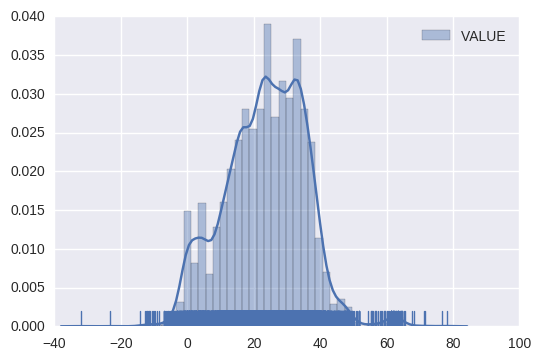

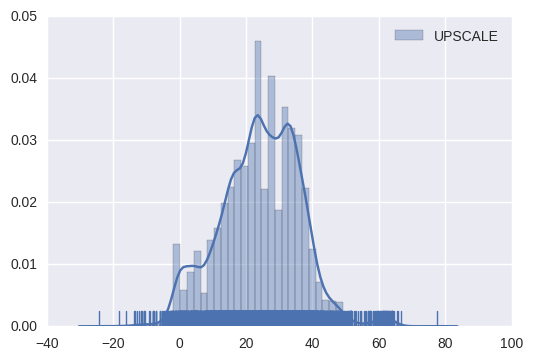

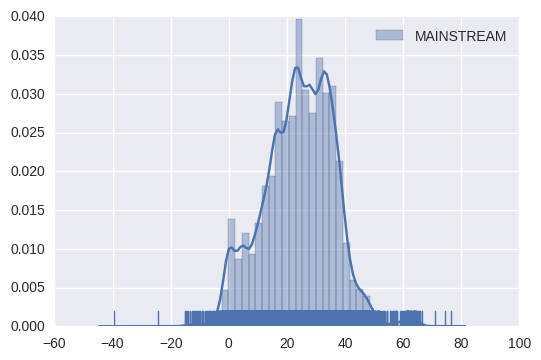

In [17]:
def feature_price ():
    d={}
    for m in whole_data.SEG_VALUE_NAME.unique():
        df = whole_data[whole_data['SEG_VALUE_NAME'] == m]
        disp = df[df['FEATURE'] == 1]
        
        d[m]= 100*(disp['BASE_PRICE'] - disp['PRICE'])/disp['BASE_PRICE']
        d[m].dropna(inplace=True)
        if len(d[m]) != 0:
            sns.distplot(d[m], rug=True, label=m)
            plt.axes().legend()
            plt.show()
    return d
d = feature_price()
        

Видно, что распределения идентичны, что 

In [17]:
sb_cat = whole_data.SUB_CATEGORY.unique()
dis = {}
for m in sb_cat:
     dis[m] = whole_data[whole_data['SUB_CATEGORY'] == m]['DISPLAY'].sum() / len(whole_data[whole_data['SUB_CATEGORY'] == m])
for w in sorted(dis, key=dis.get, reverse=True):
    print w, dis[w]

PIZZA/PREMIUM 0.147314600358
KIDS CEREAL 0.139344262295
PRETZELS 0.130293509905
MOUTHWASHES (ANTISEPTIC) 0.106066625733
ALL FAMILY CEREAL 0.0759651603551
MOUTHWASH/RINSES AND SPRAYS 0.041770708935
ADULT CEREAL 0.0317455630039


In [18]:
whole_data[whole_data['SUB_CATEGORY'] == 'PIZZA/PREMIUM']['MANUFACTURER'].unique()

array(['PRIVATE LABEL', 'TOMBSTONE', 'TONYS', 'KING'], dtype=object)

In [19]:
whole_data[whole_data['MANUFACTURER'] == 'TOMBSTONE']['BASE_PRICE'].unique()

array([ 6.29,  6.42,  6.37,  6.43,  6.3 ,  6.32,  6.34,  6.69,  6.35,
        7.49,  6.46,  6.24,  6.28,  6.41,  6.27,  4.99,  6.36,  6.31,
        6.53,  6.33,  6.49,  6.38,  6.39,  6.52,  6.22,  6.26,  6.21,
        6.25,  6.63,  6.23,  6.44,  6.4 ,  6.56,  6.2 ,  5.93,  6.13,
        6.51,  6.16,  6.17,  6.14,  6.19,  6.1 ,  6.12,  6.03,  6.07,
        5.99,  5.9 ,  6.05,  5.82,  6.  ,  6.02,  6.01,  6.06,  6.09,
        5.94,  5.95,  6.08,  5.05,  5.19,  5.96,  5.87,  5.97,  5.76,
        6.04,  6.18,  5.89,  6.11,  5.86,  5.74,  6.59,  6.5 ,  6.47,
        6.89,  6.45,  6.48,  6.62,  6.66,  6.15,  6.72,  6.77,  6.99,
        7.13,  7.26,  7.07,  7.18,  7.36,  7.35,  7.24,  7.31,  6.87,
        7.28,  6.55,  7.38,  7.4 ,  7.34,  7.3 ,  7.42,  7.05,  7.02,
        7.04,  6.76,  5.98,  6.68,  6.71,  6.78,  6.86,  6.8 ,  6.84,
        6.9 ,  7.11,  6.57,  6.54,  6.85,  6.74,  6.88,  6.82,  6.75,
        6.94,  6.79,  6.91,  6.92,  6.83,  6.7 ,  6.81,  6.73,  6.93,
        6.67,  6.61,

In [20]:
whole_data[['PRICE', 'BASE_PRICE', 'FEATURE', 'DISPLAY', 'TPR_ONLY']].head()

,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY
0,1.39,1.57,0,0,1
1,1.39,1.39,0,0,0
2,1.38,1.38,0,0,0
3,3.50,4.49,0,0,1
4,2.50,2.50,0,0,0
